## Demo 5: Variational inference

Inference in Bayesian models often requires simulation to approximate posterior distributions. To approximate these analytically intractable models, one way is to sample the posterior distribution via MCMC methods (see [DEMO 4](https://github.com/rebeccaem/probabilistic-models-class/blob/main/DEMOs/demo_04-markov_chain_monte_carlo.ipynb)). However, MCMC is often difficult to scale and to parallelize. Variational inference (VI) is an alternative approach that approximates intractible posteriors through optimization instead of sampling.


### Goals:
1. Understand VI by playing with a toy example of data from 1D mixed Gaussians.
2. Understand the trade-offs of optimizing with the forward/backward KL divergence.


## Variational Inference
* Choose a class of approximating distributions
* Find the best approximation to the true posterior

Variational inference minimizes the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)
 
$$\mathbb{KL}(\color{purple}{q(\theta)} \parallel \color{red}{p(\theta\ |\ \mathcal{D})}) = \mathbb{E}_q\left(\log\left(\frac{\color{purple}{q(\theta)}}{\color{red}{p(\theta\ |\ \mathcal{D})}}\right)\right)$$
 
from <font color='purple'>approximate distributons</font>, but we can't calculate the true <font color='red'>posterior distribution</font>.

Minimizing the Kullback-Leibler divergence 
$$
\mathbb{KL}(\color{purple}{q(\theta)} \parallel \color{red}{p(\theta\ |\ \mathcal{D})}) = -(\underbrace{\mathbb{E}_q(\log \color{blue}{p(\mathcal{D}, \theta))} - \mathbb{E}_q(\color{purple}{\log q(\theta)})}_{\color{orange}{\textrm{ELBO}}}) + \log \color{green}{p(\mathcal{D})}
$$
is equivalent to maximizing the <font color='orange'>Evidence Lower BOund (ELBO)</font>, which only requires calculating the <font color='blue'>joint distribution</font>.

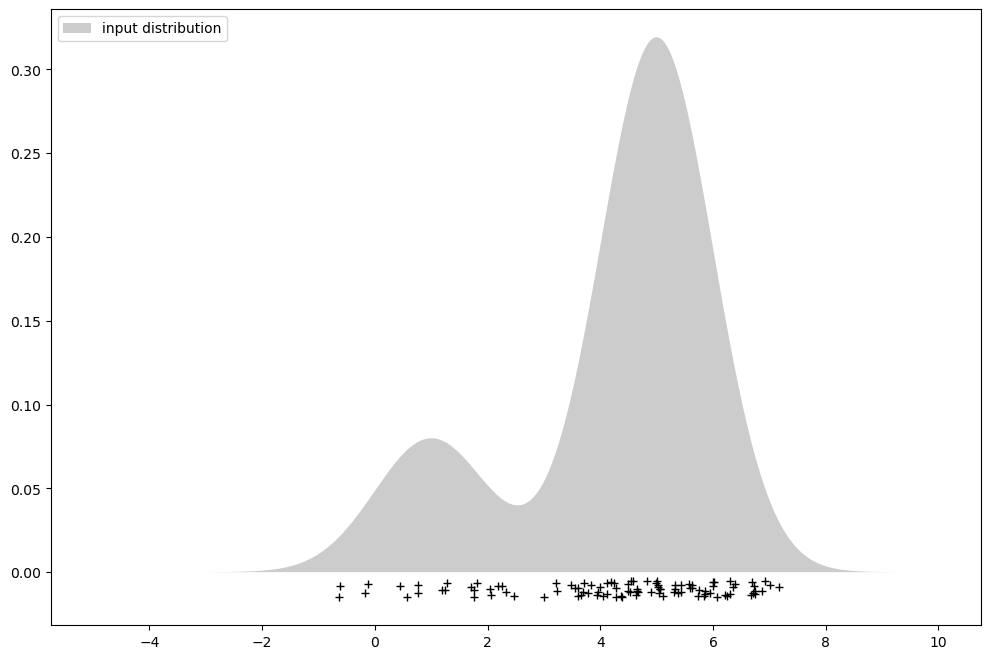

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate "true" pdf and evaluation points
# Can you reproduce the gray-shaded curve?
# Type / try your work here...


# Sampling
N = 100 # number of samples
X = np.concatenate((np.random.normal(1,1,int(0.2*N)), np.random.normal(5,1,int(0.8*N))))

# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.fill(x, y, fc="black", alpha=0.2, label="input distribution")
ax.legend(loc="upper left")
ax.plot(X, -0.005 - 0.01 * np.random.random(X.shape), "+k")

plt.show()

The **Kullback-Leibler (KL) divergence**, or relative entropy, quantifies how our chosen surrogate distribution $q(x)$ approximates the unknown $p(x)$. In fact, maximum likelihood estimation (MLE) can be interpretated as a forward KL divergence minimization approach. 

Given an unknown oracle density $p(x)$, and our surrogate density $q(x)$, minimizing their forward KL divergence is 
\begin{align}
    \text{KL}(p\|q) &= \int_\Omega \log\bigg(\frac{p(x)}{q(x)}\bigg)p(x) dx\\
                             &= \int_\Omega \log \big(p(x)\big) p(x) dx - \mathbb{E}_{p} \big [\log \big(q(x)\big)\big]\\
                             &= - \mathbb{E}_{p} \big [\log \big(q(x)\big)\big] + C\\
                             &\approx -\frac{1}{m} \sum_{i=1}^m \log \big(q(X_i)\big) + C,
\end{align}
where $\{X_i\}_{i=1}^m$ are samples from $p(x)$. 
As a result, finding $q^* = \arg\max_q \log \big(q(x)\big)$ using samples from $p(x)$ is equivalent with solving $q^* = \arg\min_q \text{KL}(p\|q)$. 
KL divergence is **asymmetric**. 
If we flip the order of inputs, we have the backward KL divergence estimator
\begin{align}
    \text{KL}(q\|p) &= \int_\Omega \log\bigg(\frac{q(x)}{p(x)}\bigg)q(x) dx\\
                             &= -\mathbb{H} \big[q(x)\big] - \mathbb{E}_{q} \big [\log \big(p(x)\big)\big]\\
                             &\approx \frac{1}{n} \sum_{i=1}^n \log\bigg(\frac{q(Y_i)}{p(Y_i)}\bigg),
\end{align}
where $\{Y_i\}_{i=1}^n$ are samples from $q(x)$.  

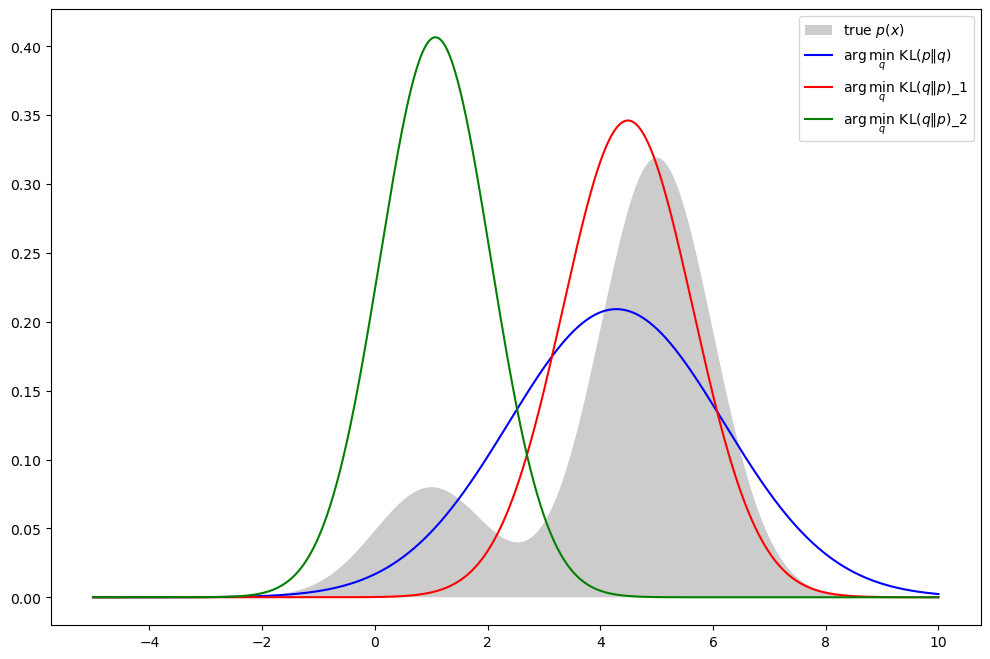

In [2]:
from scipy import stats
from scipy.optimize import minimize

## A Gaussian parameteric estimation to minimize KL(p | q)
## As we show, it is equivalent with MLE
def gaussian_pvq(params):
    mean = params[0]   
    sd = params[1]

    # Calculate negative log likelihood
    # Type / try your work here...
    # ell = 

    return nll

initParams = [1, 1]


# How do you minimize the forward KL?
# Type / try your work here...
# pvq_results = 

pvq_y = norm(pvq_results.x[0],pvq_results.x[1]).pdf(x)

## A Gaussian parametric estimation to minimize KL(q | p)
## It has two local minimum
def gaussian_qvp(params):
    mean = params[0]   
    sd = params[1]
    
    # Sample from q
    # Type / try your work here...
    # Y = 
   
    # Calculate negative log likelihood
    # Type / try your work here...
    # kl_qvp = 

    return kl_qvp

# 1st local minimum
initParams1 = [8, 1]
# How do you minimize the backward KL?
# Type / try your work here...
# qvp_results1 = 
qvp_y1 = norm(qvp_results1.x[0],qvp_results1.x[1]).pdf(x)

# 2nd local minimum
initParams2 = [1, 1]
# How do you minimize the backward KL?
# Type / try your work here...
# qvp_results2 = 
qvp_y2 = norm(qvp_results2.x[0],qvp_results2.x[1]).pdf(x)

## Plot two results
fig, ax = plt.subplots(figsize=(12,8))
ax.fill(x, y, fc="black", alpha=0.2, label="true $p(x)$")
ax.plot(x,pvq_y,label=r'$\arg\min_q$ KL($p\|q$)',c='b')
ax.plot(x,qvp_y1,label=r'$\arg\min_q$ KL($q\|p$)_1',c='r')
ax.plot(x,qvp_y2,label=r'$\arg\min_q$ KL($q\|p$)_2',c='g')
ax.legend()
plt.show()

# Questions:

1. What do you expect if we move the two Gaussians closer (or if we increase their variances)?
2. What are the trade-offs of optimizing with the forward/backward KL divergence, respectively?
